In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def FFT(f):
     FFT = np.fft.fftshift(np.fft.fft2(f))
     return FFT

# Transformada rápida de Fourier inversa 2D
def IFFT(f):
     IFFT = np.fft.ifft2(f)
     return IFFT

In [3]:
# factores multiplicativos de unidades métricas
m = 1.
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

In [4]:
wave_length = 533*nm
MO_focal_length = 20*mm
TL_focal_length = 200*mm

In [5]:
def mod_camp_entrada(U, wave_length, foco, d):
    F_0 = FFT(U)
    k = 2*np.pi/wave_length
    c = 1/(1j*wave_length*foco)

    N, M = np.shape(U)
    u, v = np.meshgrid(np.arange(M),np.arange(N))
    ker = c*np.exp(1j*(k/(2*foco))*(1-d/foco)*((u*3*um)**2 + (v*3*um)**2))
    U_f = ker*F_0

    return U_f

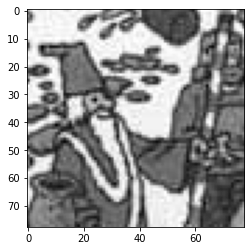

In [6]:
#Imagen a para observar a través del microscopio
obj = cv2.imread('c_clue.jpg', 0)
plt.imshow(obj,cmap='gray')
plt.show()

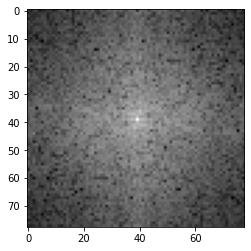

In [7]:
#Primera propafación desde el plano objeto focal objeto pasando a través de la lente y hasta el plano focal imagen 
plt.imshow(np.log(np.abs(mod_camp_entrada(obj, wave_length, MO_focal_length, MO_focal_length))**2+1), 'gray')
plt.show()

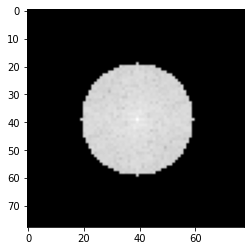

In [8]:
#Diafragma de apertura
n, m = np.shape(obj)
diafragma = np.zeros((n, m),dtype="uint8")
cv2.circle(diafragma,(int(m/2),int(n/2)),20,1,-1)

#Campo justo después del diafragma
U_2 = mod_camp_entrada(obj, wave_length, 20*mm, 20*mm)*diafragma
plt.imshow(np.log(np.abs(U_2)**2+1), 'gray')
plt.show()

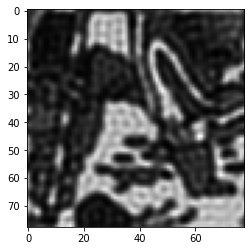

In [9]:
#Imagen que se observa a través del microscopio
plt.imshow(np.abs(np.fft.fftshift(mod_camp_entrada(U_2, wave_length, TL_focal_length, 0*mm)))**2,'gray')
plt.show()

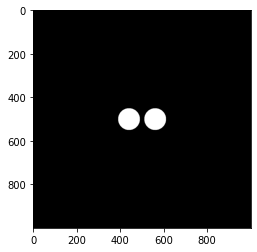

In [10]:
#Imagen a para observar a través del microscopio
im = np.zeros((1000, 1000),dtype="uint8")
cv2.circle(im,(int(1000/2)+60,int(1000/2)),50,1,-1)
cv2.circle(im,(int(1000/2)-60,int(1000/2)),50,1,-1)
plt.imshow(im, 'gray')
plt.show()

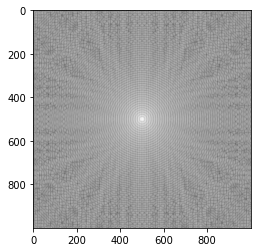

In [11]:
#Campo justo antes del diafragma
plt.imshow(np.log(np.abs(mod_camp_entrada(im, wave_length, MO_focal_length, MO_focal_length))**2+1), 'gray')
plt.show()

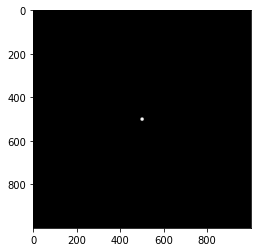

In [21]:
#Diafragma de apertura
diafragmaim = np.zeros((1000, 1000),dtype="uint8")
cv2.circle(diafragmaim,(int(1000/2),int(1000/2)),8,1,-1)

#Campo justo después del diafragma
U_2im = mod_camp_entrada(im, wave_length, 20*mm, 20*mm)*diafragmaim
plt.imshow(np.log(np.abs(U_2im)**2+1), 'gray')
plt.show()

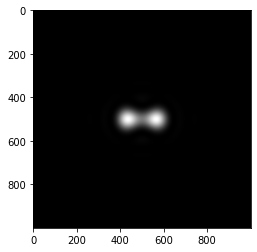

In [22]:
#Imagen que se observa a través del microscopio
plt.imshow(np.abs(np.fft.fftshift(mod_camp_entrada(U_2im, wave_length, TL_focal_length, 200*mm)))**2,'gray')
plt.show()

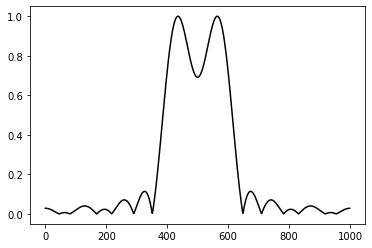

In [23]:
pat = np.abs(np.fft.fftshift(mod_camp_entrada(U_2im, wave_length, TL_focal_length, 200*mm)))/np.max(np.abs(np.fft.fftshift(mod_camp_entrada(U_2im, wave_length, TL_focal_length, 200*mm))))
plt.plot(np.arange(np.shape(pat)[0]), pat[500,:],'k')
plt.show()